In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

<b>Data</b></br>
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. 

In [2]:
data = pd.read_csv('all-bank-data.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<b>Input variables</b>

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric)

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

<b>Predict variable (desired target):</b>

y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [4]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [5]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [6]:
data['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [7]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

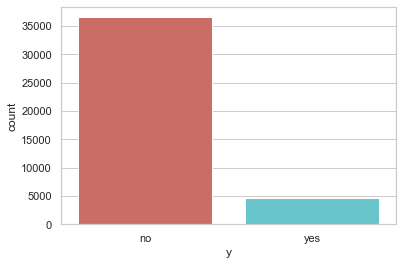

In [8]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

There are 36548 no's and 4640 yes's in the outcome variables.

Let's get a sense of the numbers across the two classes

In [9]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


Observations:

The average age of customers who bought the term deposit is higher than that of the customers who didn't. The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale. Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

c:\users\ajitrajput\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


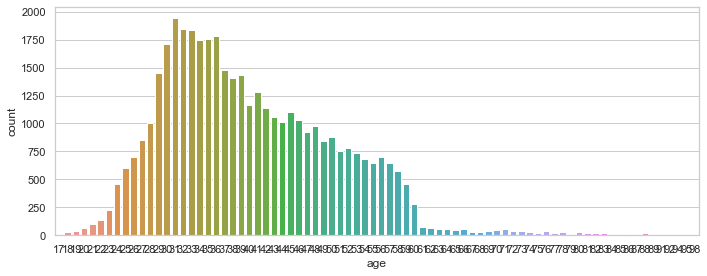

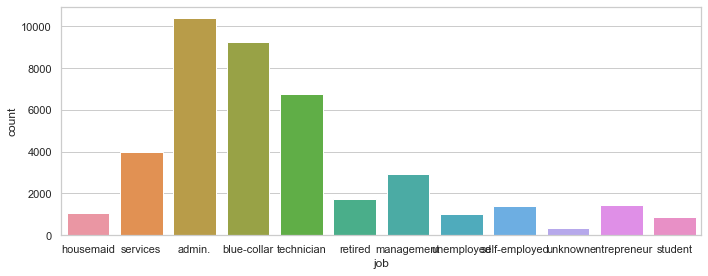

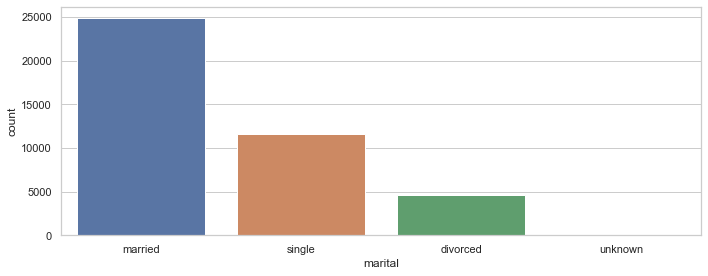

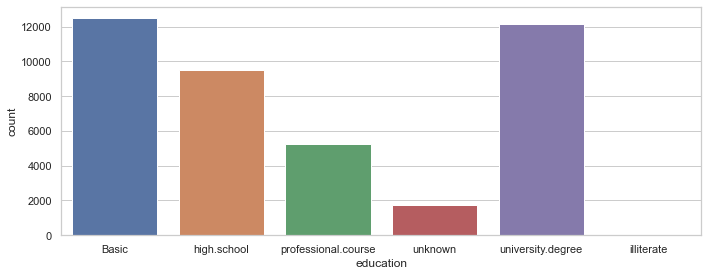

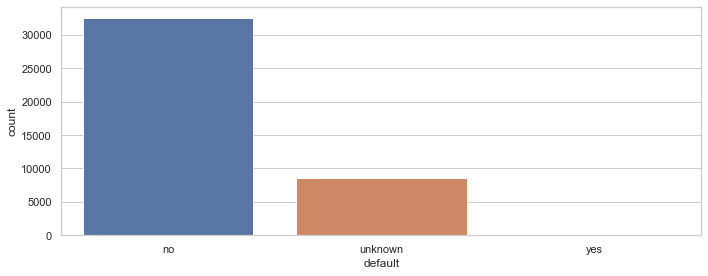

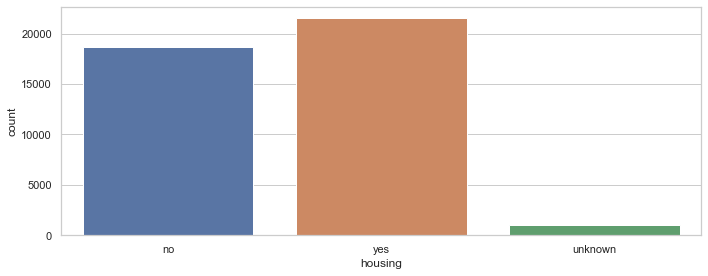

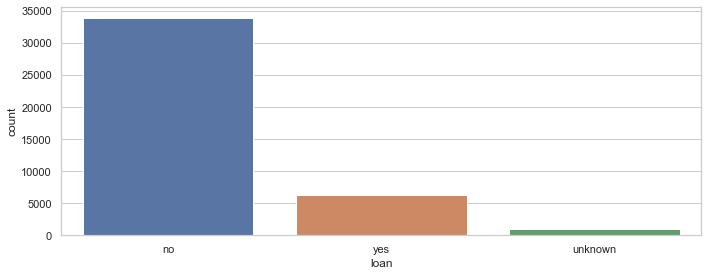

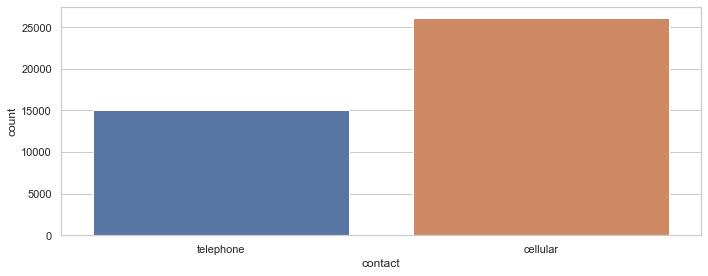

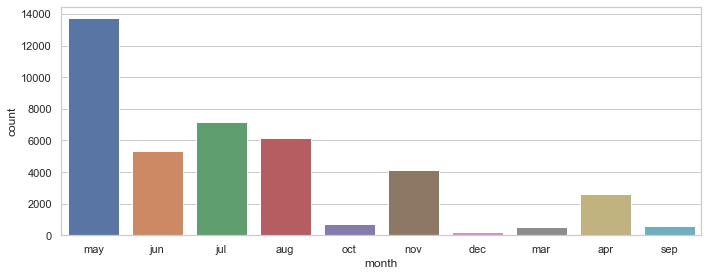

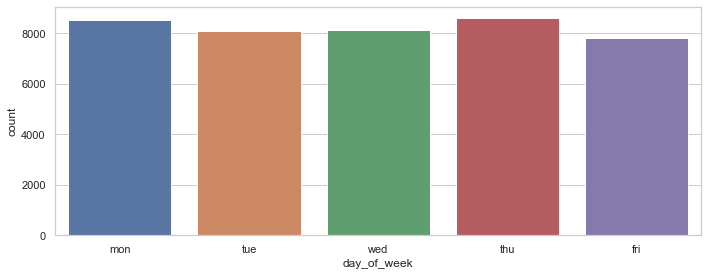

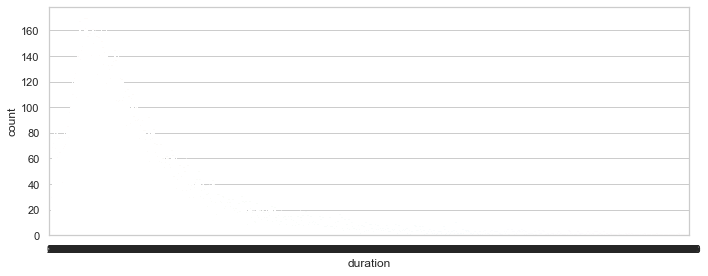

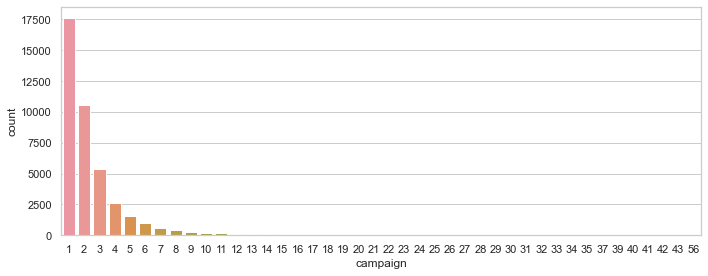

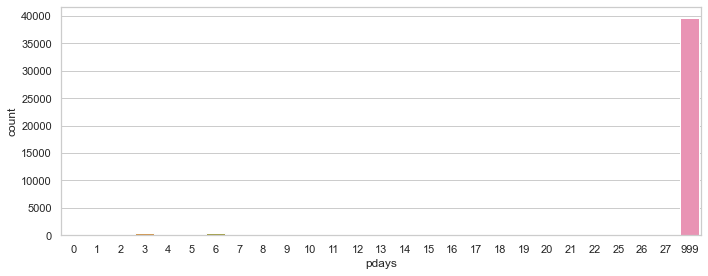

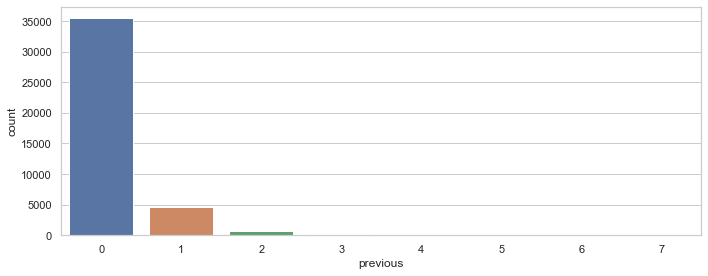

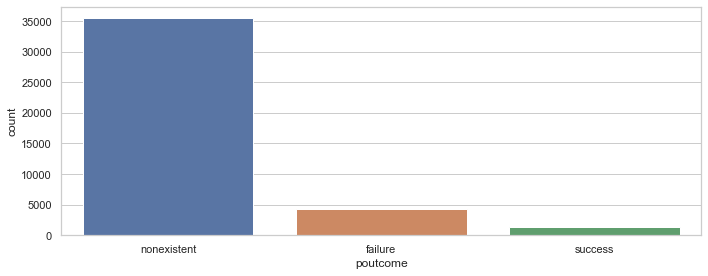

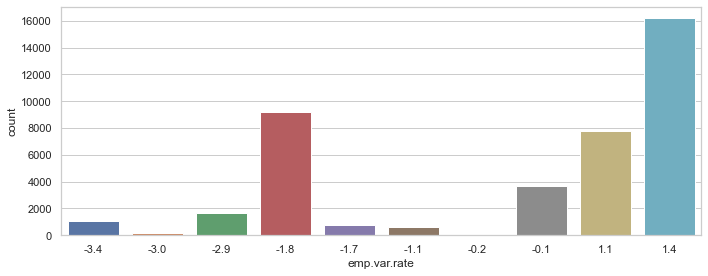

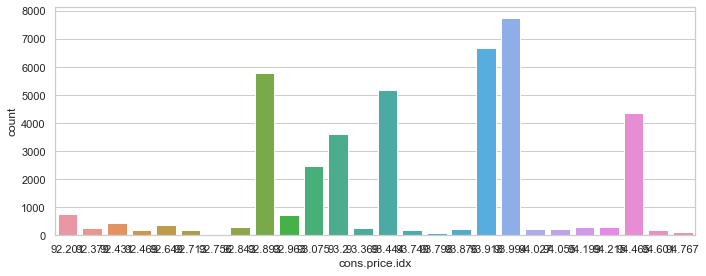

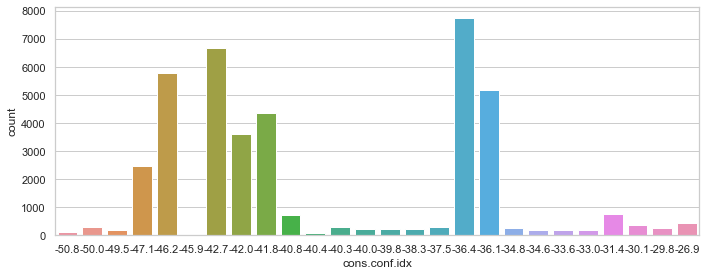

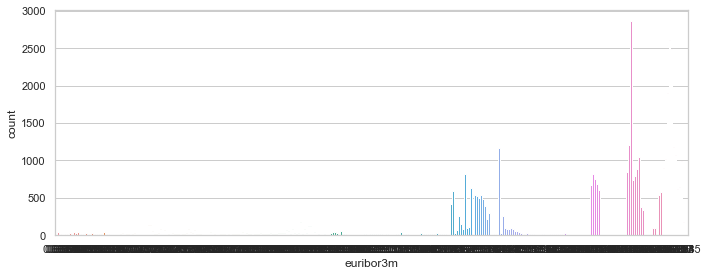

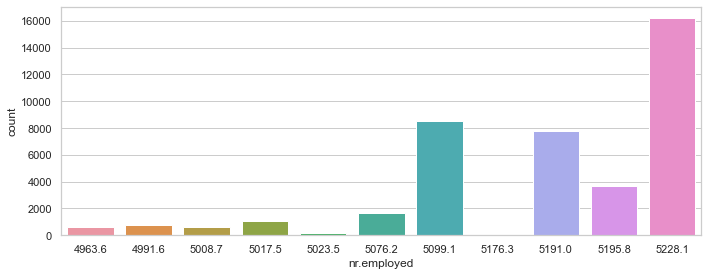

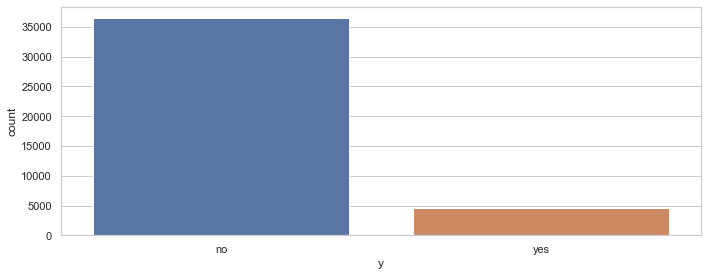

In [11]:
for col in data.columns:
    plt.figure(figsize=(10,4))
    sns.countplot(x=data[col], data=data)
    plt.tight_layout()

<h2>Feature Importance</h2>
<h4>Using Chi-Square Technique to identify important features</h4>

The Chi-square test is a non-parametric statistical test that enables us to understand the relationship between the categorical variables of the dataset.

In [13]:
from scipy.stats import chi2_contingency

# Null Hypothesis (h0) --> There is no relationship between variables
# Alternative Hypothesis --> There is relationship between variables
    
chi2_check = []
chi2_pValue =[]

categorial_columns = ['age','job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

for i in categorial_columns:
    chi2_res = chi2_contingency(pd.crosstab(data['y'],data[i]))
    print ('Feature: {} - p-Value: {}'.format(i,chi2_res[1]))
    if chi2_res[1] <= 0.05:
        print('Dependent (Reject H0)\n')
    else:
        print('Independent (H0 holds true)\n')


Feature: age - p-Value: 4.1373468061015875e-295
Dependent (Reject H0)

Feature: job - p-Value: 4.189763287563861e-199
Dependent (Reject H0)

Feature: marital - p-Value: 2.068014648442211e-26
Dependent (Reject H0)

Feature: education - p-Value: 1.517144987217509e-36
Dependent (Reject H0)

Feature: default - p-Value: 5.1619579513916376e-89
Dependent (Reject H0)

Feature: housing - p-Value: 0.05829447669453452
Independent (H0 holds true)

Feature: loan - p-Value: 0.5786752870441754
Independent (H0 holds true)

Feature: contact - p-Value: 1.5259856523129964e-189
Dependent (Reject H0)

Feature: month - p-Value: 0.0
Dependent (Reject H0)

Feature: day_of_week - p-Value: 2.9584820052785324e-05
Dependent (Reject H0)

Feature: poutcome - p-Value: 0.0
Dependent (Reject H0)



In [40]:
from sklearn.linear_model import LogisticRegression

df_lg = data[['age','job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']]
df_lg.dropna(inplace=True)

model=LogisticRegression(random_state=1)

features=pd.get_dummies(data[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']],drop_first=True)
features['age'] = data['age']

model.fit(features,data['y'])

# feature_importance=pd.DataFrame({'feature':list(features.columns),'feature_importance':[(i) for i in model.coef_[0]]})
# feature_importance.sort_values('feature_importance',ascending=False)

d = pd.DataFrame([abs(i) for i in model.coef_[0]],index=list(features.columns),columns=['Rank'])
d.head(50).sort_values(by='Rank', ascending=False)


,Rank
poutcome_success,2.258827
month_mar,1.067022
month_nov,0.963013
contact_telephone,0.921894
month_aug,0.905385
month_may,0.863625
month_jul,0.823543
month_oct,0.642046
month_dec,0.640193
job_student,0.607821


<h4> Recursive Feature Elimination</h4>

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. Features are ranked by the model’s <b>coef_</b> or <b>feature_importances_</b> attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model.

ref.ranking_ returns an array with positive integer values to indicate the attribute ranking with a lower score indicating a higher ranking

In [45]:
df_final = pd.get_dummies(data,columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
df_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [46]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

df_rfe = df_final.copy()

X = df_rfe.drop(['y'],axis=1)
y = df_rfe['y']


logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(X, y )

df_rfe = pd.DataFrame(rfe.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
df_rfe.head(50)

,Rank
poutcome_success,1
default_no,1
job_student,1
job_services,1
contact_cellular,1
job_retired,1
month_apr,1
month_aug,1
job_blue-collar,1
poutcome_nonexistent,1


In [47]:
## We will use the RFE outcome for modelling
cols = (list(df_rfe[df_rfe['Rank']==1].index))

X = df_final[cols]
y = df_final['y']

<h3>Logistic Regression Model Fitting</h3>

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_pred = logreg.predict(X_test)

In [51]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [52]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)

modelCV = LogisticRegression()

scoring = 'accuracy'

results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))


10-fold cross validation average accuracy: 0.899


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10842   127]
 [ 1122   266]]


The result is telling us that we have 10842+266 correct predictions and 1122+127 incorrect predictions.

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10969
         yes       0.68      0.19      0.30      1388

    accuracy                           0.90     12357
   macro avg       0.79      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357



<b>Interpretation:</b>

Of the entire test set, 88% of the promoted term deposit were the term deposit that the customers liked. 

Of the entire test set, 90% of the customer's preferred term deposit were promoted.

In [57]:
from sklearn.svm import SVC
svm = SVC(probability=True)
#svm = SVC(kernel='linear', probability=True, C=0.001)
svm = svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(svm.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', n_estimators=100, min_samples_leaf=5, min_samples_split=3000)
rf = rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=5, min_samples_leaf=10)
dt = dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(dt.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


Text(0, 0.5, 'Feature Names')

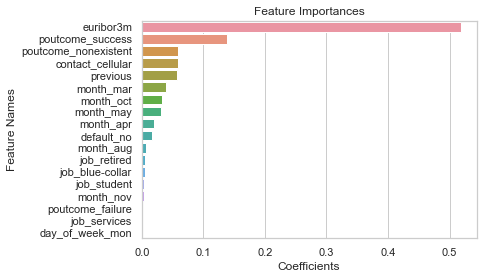

In [62]:
feature_importance_dict = {}

for i in range(len(X.columns)):
    feature_importance_dict[X.columns[i]] = rf.feature_importances_[i]
    
#Sorting the dict in descending
feature_importance_dict = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

#Unpacking the tuple
feature_importance_keys,feature_importance_values = zip(*feature_importance_dict)

#Plotting the results
sns.barplot(np.array(feature_importance_values), np.array(feature_importance_keys))
plt.title('Feature Importances')
plt.xlabel('Coefficients')
plt.ylabel('Feature Names')

<b>Results:</b>

Euribor,poutcome, contact(cellular), previous are top 4 most importat predictors of subscription. So banks should focus on them

#euribor3m: Indicator Interest Rate. If Banks offer good interest on fixed term deposit client will subscribe.<br>
#poutcome: marketing campaign<br>
#contact: contact communication type<br>
#previous: number of contacts performed before this campaign and for this client<br>
